In [ ]:
#!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[link text](https://)## Pre-Processing

### 1.) We will check the data for any missing values
####     1.1.) If so we will choose the appropriate method for filling/removing any instances with missing features
### 2.) We will check for duplicaition in our dataset
####     2.1.) We will delete duplicate instances if there are any
### 3.) We will check for any outliers in our dataset
####     3.1.) We will remove/normalize any outliers in our dataset dependent the amount of outliers there is

In [ ]:
image_segmentation = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AIForEngineersProject/New-Data/segmentation_combined.csv")
image_segmentation.head()

,CLASS,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140,125,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188,133,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105,139,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34,137,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39,111,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


# Missing Values

In [ ]:
image_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLASS                 2310 non-null   object 
 1   REGION-CENTROID-COL   2310 non-null   int64  
 2   REGION-CENTROID-ROW   2310 non-null   int64  
 3   REGION-PIXEL-COUNT    2310 non-null   int64  
 4   SHORT-LINE-DENSITY-5  2310 non-null   float64
 5   SHORT-LINE-DENSITY-2  2310 non-null   float64
 6   VEDGE-MEAN            2310 non-null   float64
 7   VEDGE-SD              2310 non-null   float64
 8   HEDGE-MEAN            2310 non-null   float64
 9   HEDGE-SD              2310 non-null   float64
 10  INTENSITY-MEAN        2310 non-null   float64
 11  RAWRED-MEAN           2310 non-null   float64
 12  RAWBLUE-MEAN          2310 non-null   float64
 13  RAWGREEN-MEAN         2310 non-null   float64
 14  EXRED-MEAN            2310 non-null   float64
 15  EXBLUE-MEAN          

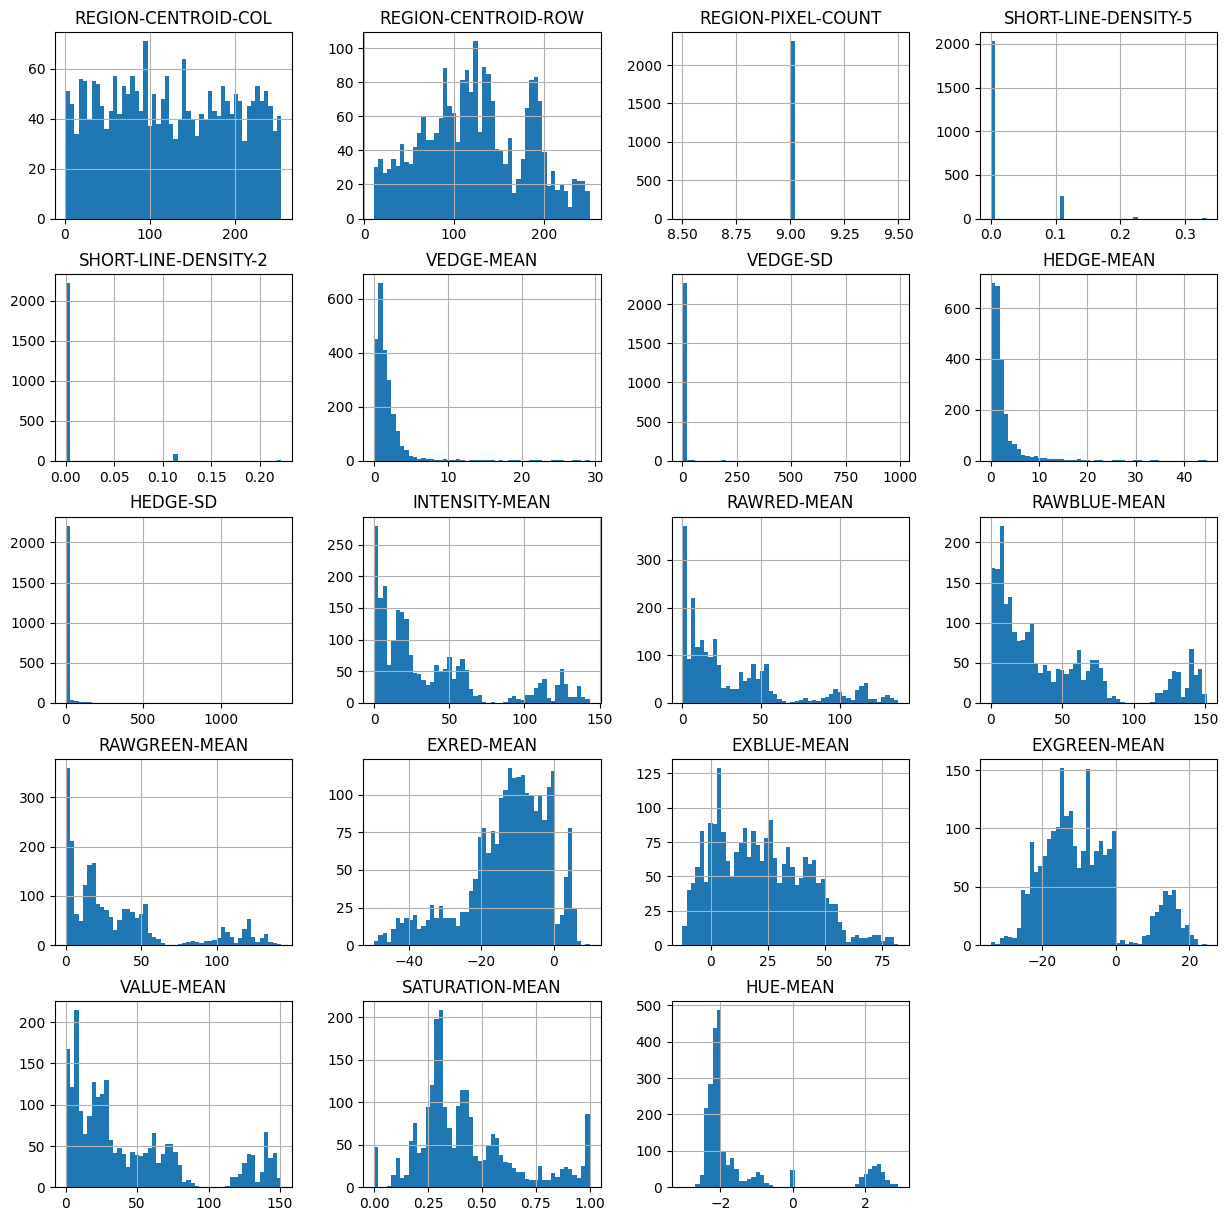

In [ ]:
# Histogram of the numerical features
image_segmentation.hist(bins=50, figsize=(15,15))
plt.show()

# Checking to see if there is any imbalance in the classes

In [ ]:
# Create dataframe
X = image_segmentation.drop(['CLASS'], axis=1)
y = image_segmentation['CLASS']

df = pd.concat([X, y], axis=1)

In [ ]:
df

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN,CLASS
0,140,125,9,0.000000,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818,BRICKFACE
1,188,133,9,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817,BRICKFACE
2,105,139,9,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946,BRICKFACE
3,34,137,9,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272,BRICKFACE
4,39,111,9,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773,BRICKFACE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,32,158,9,0.000000,0.0,0.944445,0.862963,0.833333,0.611111,7.962963,6.333334,11.888889,5.666666,-4.888889,11.777778,-6.888889,11.888889,0.520578,-1.982834,CEMENT
2306,8,162,9,0.111111,0.0,1.611111,2.062962,0.333333,0.133333,8.370370,6.666666,12.000000,6.444445,-5.111111,10.888889,-5.777778,12.000000,0.484805,-2.044946,CEMENT
2307,128,161,9,0.000000,0.0,0.555555,0.251852,0.777778,0.162963,7.148148,5.555555,10.888889,5.000000,-4.777778,11.222222,-6.444445,10.888889,0.540918,-1.996307,CEMENT
2308,150,158,9,0.000000,0.0,2.166667,1.633334,1.388889,0.418518,8.444445,7.000000,12.222222,6.111111,-4.333334,11.333333,-7.000000,12.222222,0.503086,-1.943449,CEMENT


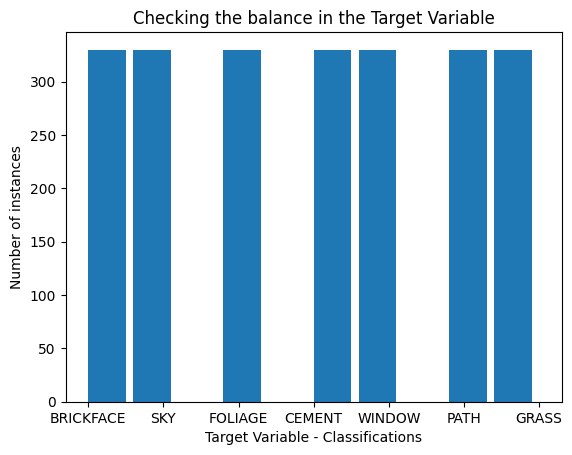

In [ ]:
# Plot instances per class

fig, ax = plt.subplots(1, 1)
ax.hist(df['CLASS'], width=0.5, align='mid')
ax.set_xlabel('Target Variable - Classifications')
ax.set_ylabel('Number of instances')
ax.set_title("Checking the balance in the Target Variable")
plt.show()

### We see that all 7 classes have 30 instances each, so it is defined as a balanced dataset. We do not need to conduct any pre processing steps such as upsampling or downsampling.

# Need to Map class names to Integers

In [ ]:
unique_values = df['CLASS'].unique()
print("Unique values before mapping:", unique_values)

Unique values before mapping: ['BRICKFACE' 'SKY' 'FOLIAGE' 'CEMENT' 'WINDOW' 'PATH' 'GRASS']


In [ ]:
# Mapping dictionary for class labels
class_mapping = {'BRICKFACE': 1, 'SKY': 2, 'FOLIAGE': 3, 'CEMENT': 4, 'WINDOW': 5, 'PATH': 6, 'GRASS': 7}

# Replace class names with integer values
df['CLASS'] = df['CLASS'].map(class_mapping)

In [ ]:
unique_values = df['CLASS'].unique()
print("Unique values after mapping:", unique_values)

Unique values after mapping: [1 2 3 4 5 6 7]


# Transform Region-Pixel-Couunt to float instead of Int

In [ ]:
# Convert integer column to float
df['REGION-PIXEL-COUNT'] = df['REGION-PIXEL-COUNT'].astype(float)
df.head()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN,CLASS
0,140,125,9.0,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818,1
1,188,133,9.0,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817,1
2,105,139,9.0,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946,1
3,34,137,9.0,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272,1
4,39,111,9.0,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773,1


# Check for missing values using missingno

<Axes: >

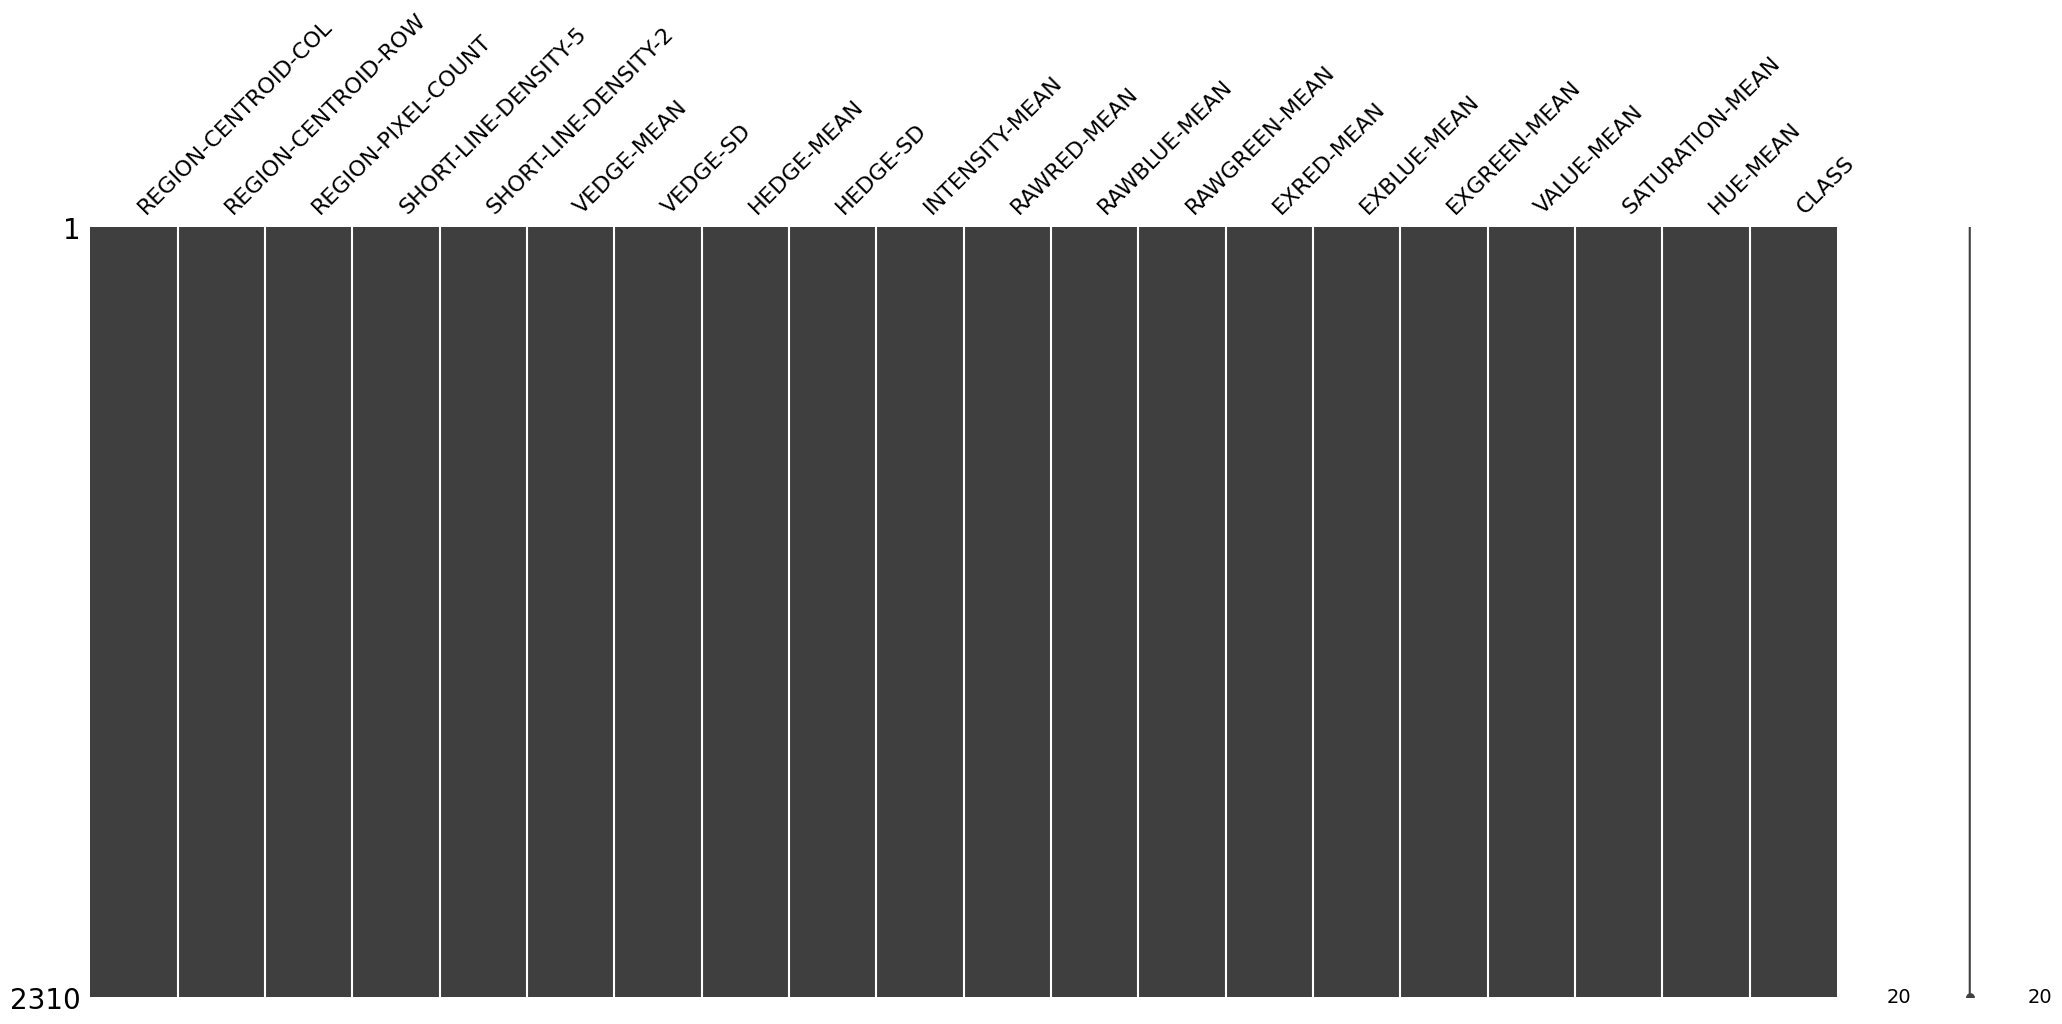

In [ ]:
msno.matrix(df)

### We see there are no missing values for the features and their target values, visually and through the info variable which is part of the features and target values

# Duplicates
### We will use df.duplicated() to check for any duplicated entries, an duse drop_duplicates to drop any

In [ ]:
# find duplicate rows
duplicate_rows = df.duplicated()

# print duplicate rows
print(duplicate_rows)

0       False
1       False
2       False
3       False
4       False
        ...  
2305    False
2306    False
2307    False
2308     True
2309    False
Length: 2310, dtype: bool


In [ ]:
# Check for the duplicate tuples, if any
duplicate_rows = df.duplicated()
# Count of duplicate rows
print(f"Duplicates: {duplicate_rows.sum()}")

Duplicates: 224


### 0 duplicates were returned, so no need to drop any from dataframe

# Outlier Detection and Removal
### We will use Winsorization, if there is any outlier detection, since we would just like to impute any outliers with percentiles rather than deleting outliers

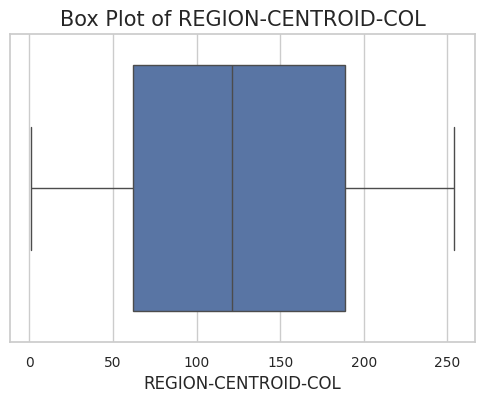

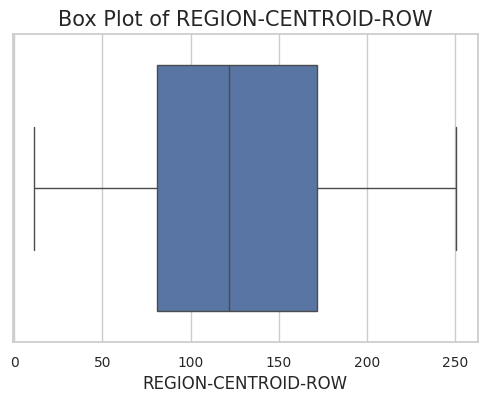

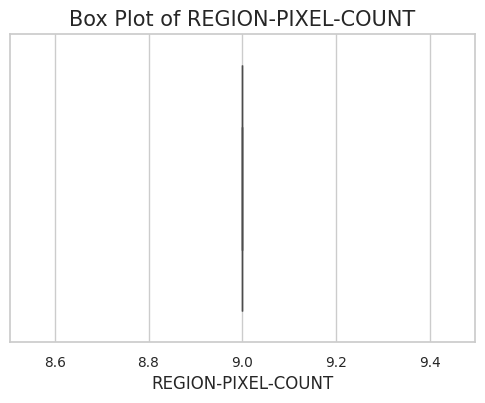

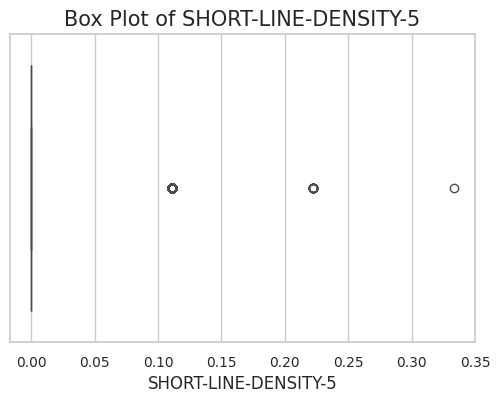

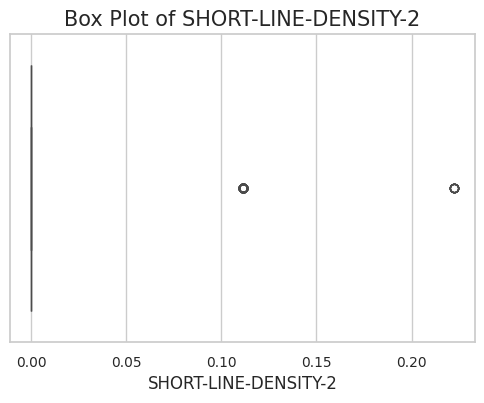

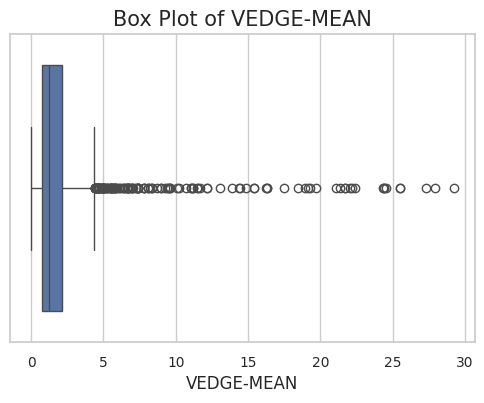

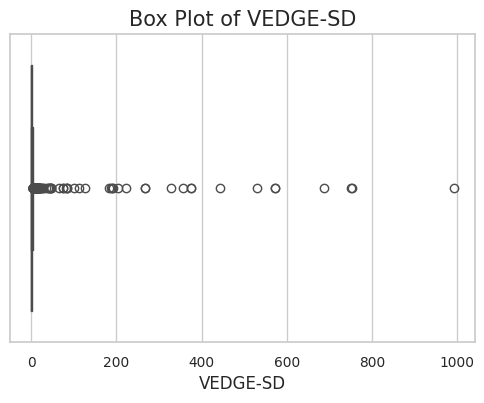

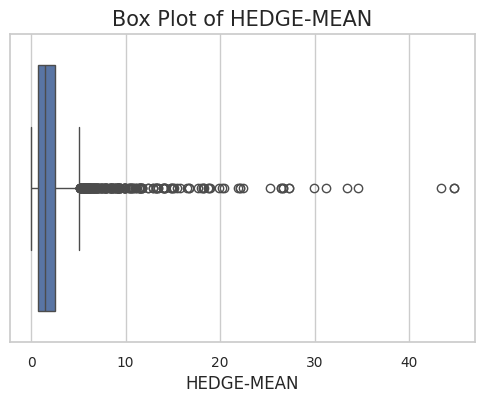

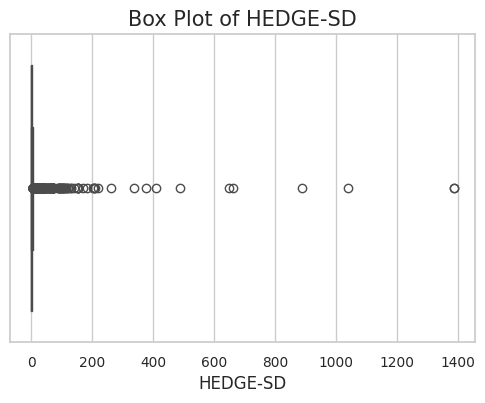

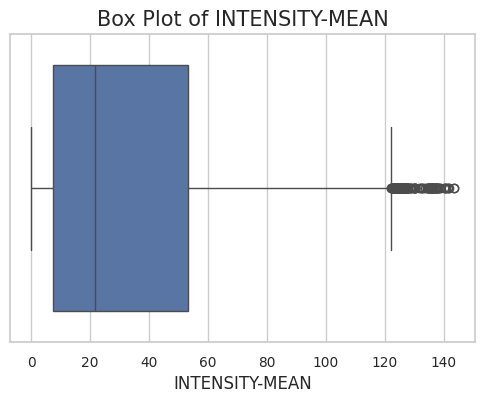

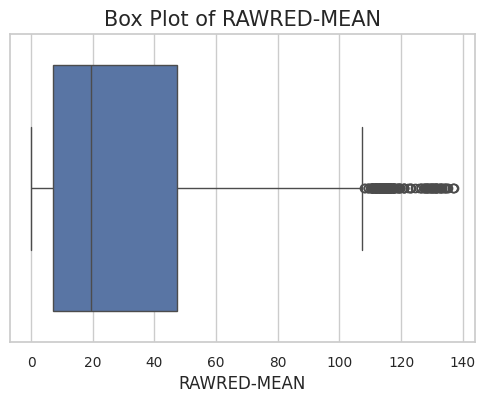

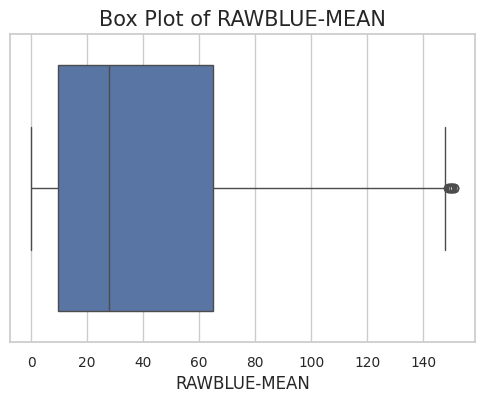

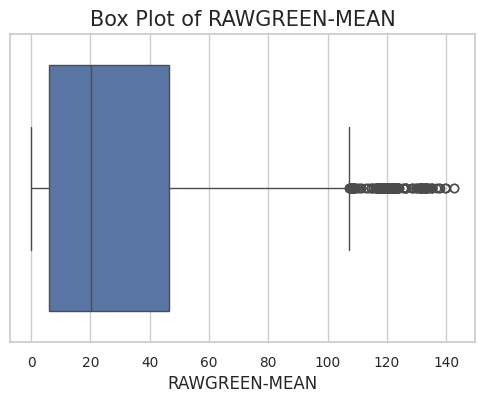

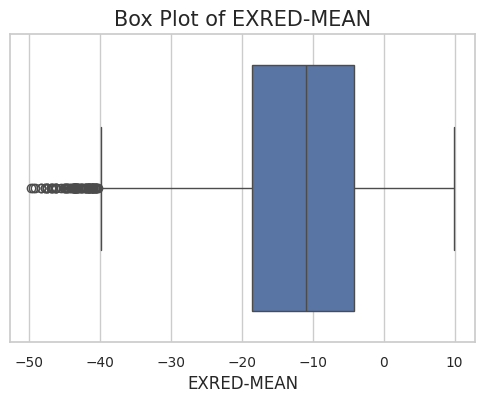

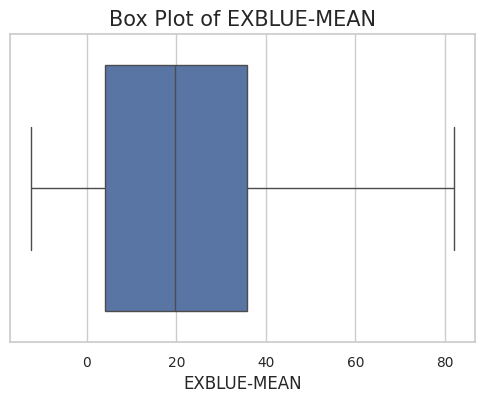

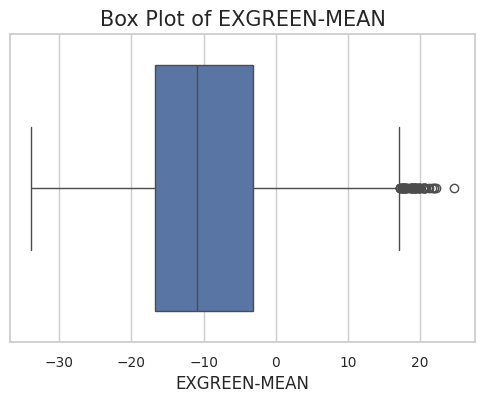

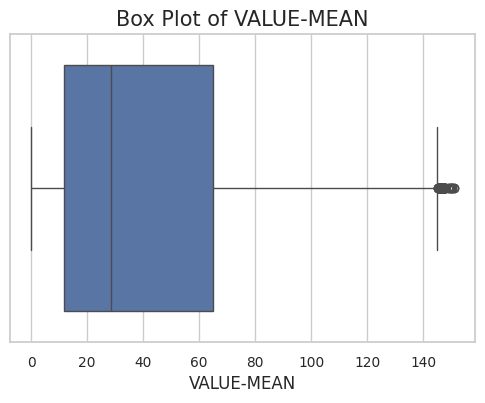

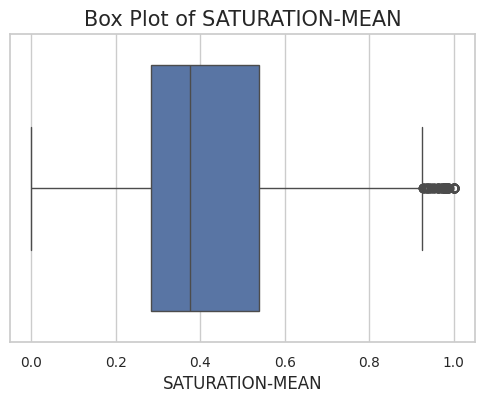

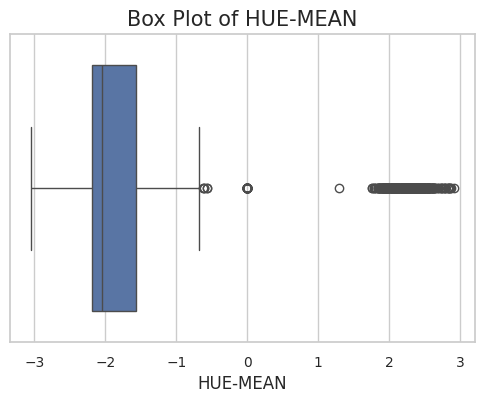

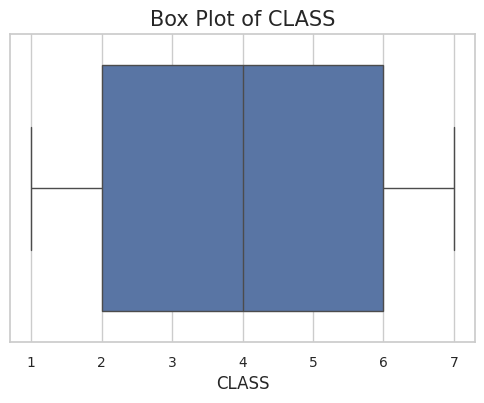

In [ ]:
sns.set(rc={'figure.figsize':(6, 4)}, font_scale=0.9, style='whitegrid')

for feature in df.columns:
    plt.figure()
    sns.boxplot(x=df[feature])
    plt.xlabel(feature, fontsize=12)
    plt.title("Box Plot of " + feature, fontsize=15)
    plt.show()

### We see that the number of outliers is not too substantial, and we assume that this is a image classification dataset, that the outliers are true values, and are good representations of the data.

# Pre Processing
### We did not need to do much pre processing steps, as the original data came clean. There was no need to impute any data since there was no missing data. We did not need to handle duplication, since there were no duplicate instances. We decided not to perform outlier handling, since we are dealing with an image dataset, which is much different than other numerical datasets, and there was not a substantial amount of outliers. We also changed region-pixel-count from Int to Float, this will help us in our analysis, and able to see correlation between features and output more clearly. We believe the float values of the Int's, does not lose the features interpretability. Finally, we did need to encode/map our output feature 'class' to integers rather than strings.

In [ ]:
# Save data into csv file
df.to_csv('/content/drive/MyDrive/Colab Notebooks/AIForEngineersProject/Data/cleaned_data_NEW.csv')